In [152]:
# !poetry run python -m vowpalwabbit -d train.dat --cb_explore 4 --bag 5
import vowpalwabbit

vw = vowpalwabbit.Workspace("--cb_explore 4 --bag 5", quiet=False)

using no cache
Reading datafile = none
num sources = 0
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
cb_type = mtr
Enabled learners: gd, scorer-identity, csoaa_ldf-rank, cb_adf, cb_explore_adf_bag, shared_feature_merger, cb_to_cbadf
Input label = CB
Output pred = ACTION_PROBS
average  since         example        example        current        current  current
loss     last          counter         weight          label        predict features

finished run
number of examples = 4194
weighted example sum = 4194.000000
weighted label sum = 0.000000
average loss = 0.773963
total feature number = 67104


In [153]:
use_train = False
if use_train:
    with open("train.dat") as f:
        for line in f:
            line = line.strip()
            print(line)
            vw.learn(line)

In [154]:
def sample_custom_pmf(pmf):
    total = sum(pmf)
    scale = 1 / total
    pmf = [x * scale for x in pmf]
    draw = random.random()
    sum_prob = 0.0
    for index, prob in enumerate(pmf):
        sum_prob += prob
        if sum_prob > draw:
            return index, prob

In [155]:
def sample_custom_pmf(pmf):
    action = np.argmax(pmf)
    return action, pmf[action]

In [156]:
import random

import numpy as np

while False:
    pmf = vw.predict("| a b c")
    action, probability = sample_custom_pmf(pmf)
    print("showing action:", action + 1)
    value = input("enter y, n or q:")
    if value == "q":
        break
    # Cost must be -tive for positive rewards.
    cost = -1 if value == "y" else 1
    # Action index starts from 1
    vw.learn(f"{action+1}:{cost}:{probability} | a b c")
    print(f"{action+1}:{cost}:{probability} | a b c")

In [157]:
import random
from collections import defaultdict

import numpy as np

cost_sum = 0.0
ctr = []
success = defaultdict(int)


for i in range(1, 1000):
    pmf = vw.predict("| a b c")
    action, probability = sample_custom_pmf(pmf)
    # Cost must be +tive for positive rewards.
    cost = np.random.binomial(1, p=probability)
    # Action index starts from 1
    success[action] += 1
    vw.learn(f"{action+1}:{cost}:{probability} | a b c")
    # print(f"{action+1}:{cost}:{probability} | a b c")
    cost_sum += cost
    ctr.append(cost_sum / i)

n.a.     n.a.                1            1.0        unknown         0:0.25       16
0.000000 0.000000            2            2.0       0:0:0.25         0:0.25       16
0.000000 0.000000            4            4.0       0:0:0.25         0:0.25       16
0.000000 0.000000            8            8.0       0:0:0.25         0:0.25       16
0.125000 0.250000           16           16.0       1:0:0.32         1:0.32       16
0.187500 0.250000           32           32.0       2:1:0.37         2:0.37       16
0.500000 0.812500           64           64.0        2:1:0.8          2:0.8       16
0.593750 0.687500          128          128.0        2:1:0.6          2:0.6       16
0.609375 0.625000          256          256.0        3:1:0.4          3:0.4       16
0.613281 0.617188          512          512.0        3:0:0.8          3:0.8       16
0.644531 0.675781         1024         1024.0        2:1:0.8          2:0.8       16


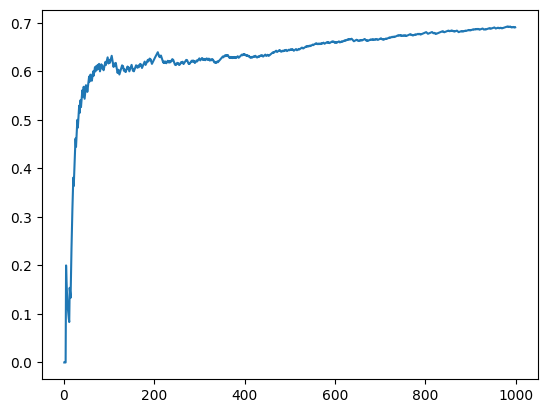

In [158]:
import matplotlib.pyplot as plt

plt.plot(range(1, 1000), ctr)

In [159]:
success

defaultdict(int, {0: 41, 1: 10, 2: 547, 3: 401})

In [151]:
cost_sum

802.0